In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats

import datetime 

For listings data
- id is the unique Airbnb identifier 
- scrape_id is the identifier of the scrape that was performed (likely not relevant)

For reviews data
- listing_id is the unique Airbnb identifier
- id is for the specific review (I tihnk??)

In [20]:
#File path will need to be rewritten for your own laptop
#Original dataframes from Excel file
all_reviews_original = pd.read_csv('/Users/Admin/Downloads/CISC 351 Airbnb Data/TO Detailed Reviews CISC 351.csv')
all_listings_original = pd.read_csv('/Users/Admin/Downloads/CISC 351 Airbnb Data/TO Detailed Listings CISC 351.csv')

all_reviews_data = all_reviews_original
all_listings_data = all_listings_original

#Remove scientific notation (shown on id column), code got from: https://stackoverflow.com/questions/17737300/suppressing-scientific-notation-in-pandas
pd.options.display.float_format = '{:20,.2f}'.format

#pd.set_option('display.max_columns', None)

#display(all_reviews_data.sample(5))
#display(all_listings_data.sample(5))

Data Exploration

Before our first question, we will run some summary statistics and EDA to explore and better understand our data before cleaning and preparing it for our model. You will recognize some insights from our future cells.

In [21]:
# Get summary statistics of the data
display(all_reviews_data.describe())
display(all_reviews_data.info())
display(all_listings_data.describe())
display(all_listings_data.info())

listing_id                           id  \
count                   511,139.00                   511,139.00   
mean    164,708,184,233,769,600.00   413,285,713,605,032,064.00   
std     321,162,160,053,172,480.00   421,182,380,169,050,624.00   
min                       1,419.00                     7,830.00   
25%                  15,845,514.00               402,772,207.50   
50%                  28,356,847.00   434,715,982,850,224,064.00   
75%                  51,824,863.00   856,549,323,983,266,688.00   
max   1,061,704,502,413,506,176.00 1,064,633,350,092,254,208.00   

               reviewer_id  
count           511,139.00  
mean        169,954,789.53  
std         151,014,588.85  
min               1,396.00  
25%          44,184,685.00  
50%         126,112,703.00  
75%         256,519,526.50  
max         554,887,730.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511139 entries, 0 to 511138
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     511139 non-null  int64 
 1   id             511139 non-null  int64 
 2   date           511139 non-null  object
 3   reviewer_id    511139 non-null  int64 
 4   reviewer_name  511139 non-null  object
 5   comments       511061 non-null  object
dtypes: int64(3), object(3)
memory usage: 23.4+ MB


None

id             scrape_id          description  \
count                    20,386.00             20,386.00                 0.00   
mean    435,422,411,877,020,160.00 20,240,100,000,000.00                  NaN   
std     444,413,479,251,897,856.00                  0.00                  NaN   
min                       1,419.00 20,240,100,000,000.00                  NaN   
25%                  28,071,861.00 20,240,100,000,000.00                  NaN   
50%     549,306,280,137,510,080.00 20,240,100,000,000.00                  NaN   
75%     891,368,564,515,201,536.00 20,240,100,000,000.00                  NaN   
max   1,063,308,678,370,668,672.00 20,240,100,000,000.00                  NaN   

                   host_id  host_listings_count  host_total_listings_count  \
count            20,386.00            20,384.00                  20,384.00   
mean        199,557,763.22                 7.80                      13.63   
std         186,479,508.21                38.86                      99.94   
min               1,565.00                 1.00                       1.00   
25%          34,016,441.00                 1.00                       1.00   
50%         134,097,220.00                 2.00                       3.00   
75%         364,372,625.00                 4.00                       7.00   
max         554,893,061.00             2,260.00                   8,875.00   

       neighbourhood_group_cleansed             latitude            longitude  \
count                          0.00            20,386.00            20,386.00   
mean                            NaN                43.68               -79.40   
std                             NaN                 0.05                 0.07   
min                             NaN                43.59               -79.62   
25%                             NaN                43.65               -79.43   
50%                             NaN                43.67               -79.40   
75%                             NaN                43.71               -79.37   
max                             NaN                43.84               -79.13   

              accommodates  ...  review_scores_cleanliness  \
count            20,386.00  ...                  15,131.00   
mean                  3.14  ...                       4.73   
std                   2.02  ...                       0.45   
min                   1.00  ...                       0.00   
25%                   2.00  ...                       4.67   
50%                   2.00  ...                       4.87   
75%                   4.00  ...                       5.00   
max                  16.00  ...                       5.00   

       review_scores_checkin  review_scores_communication  \
count              15,128.00                    15,129.00   
mean                    4.85                         4.86   
std                     0.35                         0.35   
min                     0.00                         1.00   
25%                     4.84                         4.87   
50%                     4.96                         4.98   
75%                     5.00                         5.00   
max                     5.00                         5.00   

       review_scores_location  review_scores_value  \
count               15,127.00            15,129.00   
mean                     4.83                 4.69   
std                      0.31                 0.44   
min                      1.00                 0.00   
25%                      4.78                 4.61   
50%                      4.92                 4.79   
75%                      5.00                 4.95   
max                      5.00                 5.00   

       calculated_host_listings_count  \
count                       20,386.00   
mean                             4.50   
std                              9.53   
min                              1.00   
25%                              1.00   
50%                        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20386 entries, 0 to 20385
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20386 non-null  int64  
 1   listing_url                                   20386 non-null  object 
 2   scrape_id                                     20386 non-null  float64
 3   last_scraped                                  20386 non-null  object 
 4   source                                        20386 non-null  object 
 5   name                                          20386 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         11337 non-null  object 
 8   picture_url                                   20386 non-null  object 
 9   host_id                                       20386 non-null 

None

There are several columns specific for a URL link, a unique ID of a scrape which are not relevant for our analysis. While additional data cleaning will be done later as well, we can go and remove these columns are they do not have bearing on our analysis 


In [22]:
all_listings_data.drop(columns = ['listing_url', 'last_scraped', 'source', 'host_picture_url', 'host_url', 'host_thumbnail_url', 'picture_url'])

id             scrape_id  \
0                 24018771 20,240,100,000,000.00   
1                 50680103 20,240,100,000,000.00   
2      1018845223985730763 20,240,100,000,000.00   
3       842991103042611460 20,240,100,000,000.00   
4      1004965626999219484 20,240,100,000,000.00   
...                    ...                   ...   
20381             43740738 20,240,100,000,000.00   
20382             14694749 20,240,100,000,000.00   
20383   955162189200947880 20,240,100,000,000.00   
20384   894406870652307040 20,240,100,000,000.00   
20385   616449374883279574 20,240,100,000,000.00   

                                                    name  description  \
0      Home in Toronto · ★4.74 · 1 bedroom · 1 bed · ...          NaN   
1                   Boat in Toronto · 1 bedroom · 1 bath          NaN   
2      Townhouse in Toronto · ★New · 1 bedroom · 1 be...          NaN   
3      Bed and breakfast in Toronto · ★4.67 · 1 bedro...          NaN   
4      Home in Toronto · ★4.73 · 1 bedroom · 4 beds ·...          NaN   
...                                                  ...          ...   
20381  Condo in Toronto · ★4.88 · 1 bedroom · 1 bed ·...          NaN   
20382  Rental unit in Toronto · ★4.92 · 1 bedroom · 1...          NaN   
20383  Townhouse in Toronto · ★5.0 · 4 bedrooms · 5 b...          NaN   
20384  Rental unit in Toronto · ★4.51 · 2 bedrooms · ...          NaN   
20385  Condo in Toronto · ★4.96 · 1 bedroom · 1 bed ·...          NaN   

                                   neighborhood_overview    host_id host_name  \
0                                                    NaN  179038571   Yongmei   
1                                                    NaN  396389036     Turan   
2                                                    NaN    9660032     Karly   
3                                                    NaN  128444795       Yan   
4                                                    NaN  120551336  Saiharan   
...                                                  ...        ...       ...   
20381  Celebrities and Professional Athletes Frequent...  349513985     Ma De   
20382  Brockton Village is a great mixed neighbourhoo...   91382765     Jason   
20383  Walking distance of shops, parks, and restaura...  531113660     Firoz   
20384  Welcome to Toronto Cityplace, a place to live ...  514941841    Andriy   
20385  Amazing location 500m from CN Tower, 450m from...  158368655   Norbert   

       host_since        host_location  \
0      2018-03-17      Toronto, Canada   
1      2021-04-10                  NaN   
2      2013-10-27      Toronto, Canada   
3      2017-05-01      Toronto, Canada   
4      2017-03-13      Toronto, Canada   
...           ...                  ...   
20381  2020-06-10      Toronto, Canada   
20382  2016-08-22      Toronto, Canada   
20383  2023-08-10      Toronto, Canada   
20384  2023-05-15                  NaN   
20385  2017-11-12  Mississauga, Canada   

                                              host_about  ...  \
0                                                    NaN  ...   
1                                                    NaN  ...   
2      I will be always there for your needs during y...  ...   
3      Hello, Thank you for viewing my listings. I pr...  ...   
4                                                    NaN  ...   
...                                                  ...  ...   
20381                                             Hello!  ...   
20382                                                NaN  ...   
20383  Hi! I love traveling and meeting new people! I...  ...   
20384                                                NaN  ...   
20385                                                NaN  ...   

      review_scores_communication review_scores_location  review_scores_value  \
0                            4.78                   4.77                 4.72   
1                             NaN                    NaN                  NaN   
2                   

We also want to create a separate column for Average Score. Score in Airbnb is calculated off 7 metrics, ranging from a location score, to the score of the host and communication. To make our analysis simpler, we want to have an average score displaying these options together.

Currently, we also need to transform our price variable from a string into a float. This means removing any symbols or spaces that will not be interpreted correctly, and then transoforming the type into a float

In [23]:
#Transform price from a string into a float
all_listings_data['price'] = all_listings_data['price'].str.replace('$', '')
all_listings_data['price'] = all_listings_data['price'].str.replace(' ', '')
all_listings_data['price'] = all_listings_data['price'].str.replace(',', '')
all_listings_data['price'] = all_listings_data['price'].astype(float)

Explore statistics related to our housing price, reviews, and availability_30

- Large housing range learning towards the lower values. We need to log the result to give a better understanding
- Reviews are all very similar with most of the IQR values falling into 4.5+

In [24]:
#Box plot showing the IQR and outliers for price
fig = px.box(all_listings_data, x = 'price')
fig.show()

#Histogram showing distribution of prices based
fig = px.histogram(all_listings_data, x = 'price')
fig.show()

all_listings_data['price_log'] = np.log(1 + all_listings_data['price'])
fig = px.box(all_listings_data, x = 'price_log')
fig.show()

fig = px.histogram(all_listings_data, x = 'price_log')
fig.show()

In [25]:
ratings_metrics = all_listings_data[['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness',
                                    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                                    'review_scores_value'] ]
fig = go.Figure()
for metric in ratings_metrics:
    fig.add_trace(go.Box(x = all_listings_data[metric].values, name=all_listings_data[metric].name))

fig.update_layout(width = 1000, height = 600, xaxis_title = "Score (out of 5)", yaxis_title = "Review metric", showlegend = False)
fig.show()

Explore statistics related to nights stayed. We want to understand
1) How do room types affect our price and availabilty?
2) How do price and availability affect each other?
3) How do reviews impact our availability?
4) Does the neighbourhood play a role in pricing and availability?

In [26]:
#Average price of houses by room type
average_price_by_room= all_listings_data.groupby('room_type')['price'].mean()
fig_1 = px.bar(average_price_by_room, y='price')
fig_1.show()

#How does price relate with availability in the next 30 days and room type?
fig_2= px.scatter(all_listings_data, x = 'availability_30', y = 'price', color='room_type')
fig_2.show()


In [27]:
#Average price of houses by room type
average_price_by_neighbourhood= all_listings_data.groupby('neighbourhood_cleansed')['price'].mean()
fig = px.bar(average_price_by_neighbourhood, y='price')
fig.show()

#Create additional df for just neighbourhood data, to be merged with final dataframe
neighbourhoods = all_listings_data[['neighbourhood_cleansed']]
neighbourhoods['nb_name'] = all_listings_data['neighbourhood_cleansed']

#Average number of accomodations by neighbourhood
average_accomodation_by_region = all_listings_data.groupby(['neighbourhood_cleansed'])['availability_30'].mean().sort_values(ascending=True)
average_accomodation_by_region.columns= ['nb name', 'availablity_30']
#display(average_accomodation_by_region)
fig_1 = px.bar(average_accomodation_by_region, y = 'availability_30')
fig_1.show()

/var/folders/f1/3zyq_tc11zg_6z_nh5xjcsnw0000gn/T/ipykernel_5435/2268373228.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



"#Count the number of Airbnbs per neighbourhood\nneighbourhood_count = all_listings_data['neighbourhood_cleansed'].value_counts()\n\n#Merge it together into one dataframe\nneighbourhood_acc1 = pd.merge(average_accomodation_by_region, neighbourhood_count, on = 'neighbourhood_cleansed')\nneighbourhood_acc2 = pd.merge(neighbourhood_acc1, neighbourhoods, on = 'neighbourhood_cleansed')\nnb = pd.DataFrame(neighbourhood_acc2)\n\nfig_2 = px.scatter(neighbourhood_acc2, y = 'count', x = 'availability_30', color = 'nb_name')\nfig_2.show()\n\nfig_3 = px.scatter(all_listings_data, y = 'price', x = 'availability_30', color = 'neighbourhood_cleansed')\nfig_3.show()"

In [36]:
fig = px.scatter(all_listings_data, y = 'review_scores_rating', x = 'availability_30')
fig.show()

In [39]:
response_host = all_listings_data.groupby(['host_response_time', 'host_is_superhost']).size().reset_index(name='count')

fig = px.bar(response_host, x='host_response_time', y='count', color='host_is_superhost',
             barmode='group', labels={'host_response_time': 'Response Time', 'count': 'Count', 'host_is_superhost': 'Superhost'},
             title='Superhost vs Non-Superhost response rates')
fig.show()

Let's take a look at the missing values. We test both datasets to understand how missing values plays a role in our dataset.
- Our listings data have several columns with a lot of missing values. We need to be able to remove them or impute that later on in our further analysis
- Reviews data however, has very few missing values so it will likely not highly influence our dataset. There will likely not be complex imputations or procedures needed to further clean the dataset

id                                                             0.00
listing_url                                                    0.00
scrape_id                                                      0.00
last_scraped                                                   0.00
source                                                         0.00
                                                       ...         
calculated_host_listings_count_private_rooms                   0.00
calculated_host_listings_count_shared_rooms                    0.00
reviews_per_month                                             25.79
price_log                                                     18.60
response_time_ordinal                                         12.41
Length: 76, dtype: float64

<Axes: >

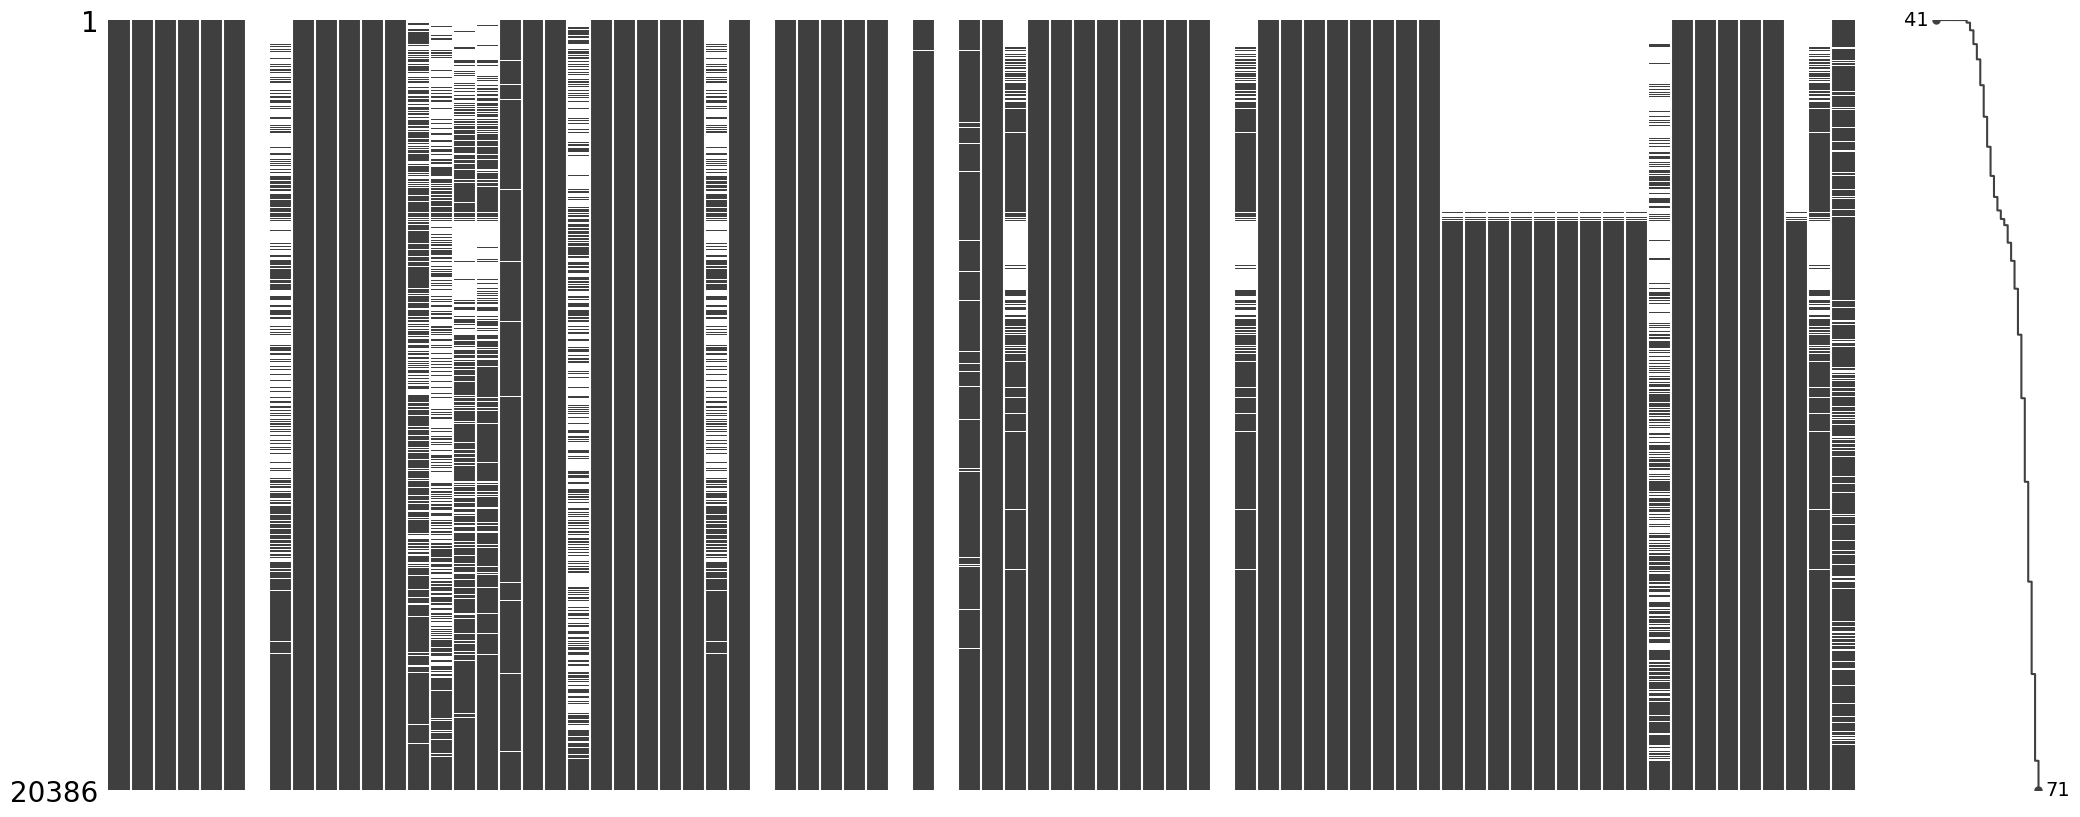

In [15]:
import missingno as msno
# What percentage of values in each column is null?
display((all_listings_data.isna().sum()/len(all_listings_data)*100))
msno.matrix(all_listings_data, sort='ascending')

In [16]:
# What percentage of values in each column is null?
display((all_reviews_data.isna().sum()/len(all_reviews_data)*100))

listing_id                      0.00
id                              0.00
date                            0.00
reviewer_id                     0.00
reviewer_name                   0.00
comments                        0.02
dtype: float64

In [17]:
#Create a column determining if the property has a shared bathroom or not
def is_shared_bathroom(text):
    if pd.isnull(text):
        return None
    elif "shared" in text.lower():
        return 1
    else:
        return 0

#Transform bathroom_text field in data set into a numeric value based on its description
bathroom_mapping = {float('nan'): float('nan'), '0 shared baths': 0,
                    'Shared half-bath': 0.5, 'Half-bath': 0.5, '1 shared bath': 1, '1 bath': 1, '1 private bath': 1,  
                    '1.5 shared baths': 1.5, '1.5 baths': 1.5,
                    '2 shared baths': 2, '2 baths': 2, '2.5 baths': 2.5,
                    '3 baths': 3, '3.5 baths': 3.5,  
                    '4 baths': 4, '4.5 baths': 4.5,
                    '4.5 shared baths': 4.5, '5 baths': 5,
                    '3 shared baths': 3, 'Private half-bath': 0.5, '0 baths': 0,
                    '8 baths': 8, '6 baths': 6, '2.5 shared baths': 2.5,
                    '3.5 shared baths': 3.5, '5.5 baths': 5.5, '6.5 baths': 6.5,
                    '4 shared baths': 4, '7 baths': 7}

#Create the new columns for bathrooms
all_listings_data['is_shared_bathroom'] = all_listings_data['bathrooms_text'].apply(is_shared_bathroom)
all_listings_data['bathrooms_ordinal'] = all_listings_data['bathrooms_text'].map(bathroom_mapping)
all_listings_data.drop(columns=['bathrooms_text'], inplace=True)
all_listings_data.drop(columns=['bathrooms'], inplace=True)

In [26]:
feature = ['bathrooms_ordinal', 'bedrooms', 'beds', 'host_is_superhost']

for i in feature:
    feature_counts = all_listings_data[i].value_counts().reset_index()
    feature_counts.columns = [i, 'Count']

    # Plot the counts of unique values for 'bathrooms'
    fig_1 = px.bar(feature_counts, x=i, y='Count', title='Number of ' + i + ' in Airbnbs')
    fig_1.update_xaxes(title=i)
    fig_1.update_yaxes(title='Count')
    fig_1.show()